# Notebook for lab 1 

In [29]:
# Notebook makes use of code from lab 0 solution
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image

import maze_minotaur as mz 
import bank_town as bank

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 1: The Maze and the Random Minotaur
The objective of problem 1 is to find a policy that helps the player escape the maze. 

In [30]:
# Description of the maze as a numpy array
maze = np.array([
    [ 0,  0,  1,  0,  0,  0,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  1,  0,  0,  1,  1,  1],
    [ 0,  0,  1,  0,  0,  1,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  1,  1,  1,  1,  1,  1,  0],
    [ 0,  0,  0,  0,  1,  2,  0,  0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

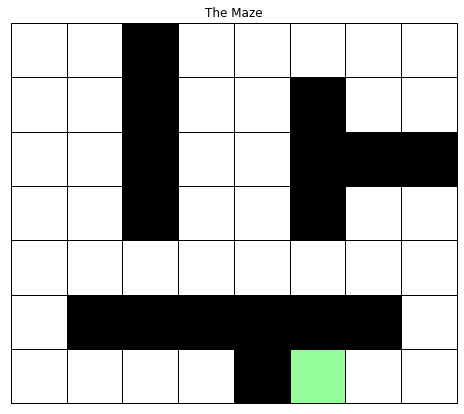

In [31]:
mz.draw_maze(maze)

In [32]:
# Create an environment maze
env = mz.Maze(maze, minotaur_cant_stay=True)
# env.show()

#### Solving the problem with finite time horizon

In [33]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

start  = (0,0,6,5)
start_state = env.map[start]
print(f"Maximal probability of exiting the maze {V[start_state,0]}")

Maximal probability of exiting the maze 1.0


In [34]:
# Simulate the shortest path starting from position A
method = 'DynProg'
path = env.simulate(start, policy, method)

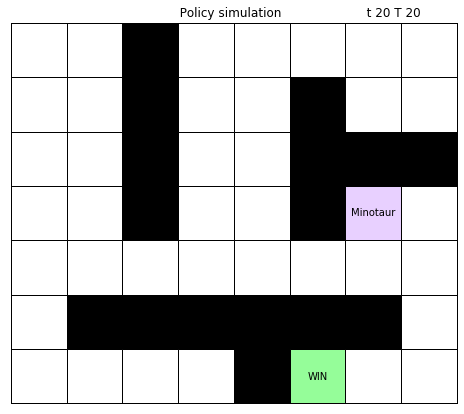

In [28]:
# Play the game 
mz.animate_solution(maze, path)

#### Maximal probability of exiting the maze w.r.t T when minotaur CANNOT stay



  0%|          | 0/30 [00:00<?, ?it/s]

  3%|▎         | 1/30 [00:00<00:11,  2.58it/s]

  7%|▋         | 2/30 [00:01<00:13,  2.07it/s]

 10%|█         | 3/30 [00:01<00:15,  1.73it/s]

 13%|█▎        | 4/30 [00:02<00:19,  1.37it/s]

 17%|█▋        | 5/30 [00:04<00:24,  1.01it/s]

 20%|██        | 6/30 [00:06<00:31,  1.30s/it]

 23%|██▎       | 7/30 [00:08<00:36,  1.59s/it]

 27%|██▋       | 8/30 [00:11<00:40,  1.84s/it]

 30%|███       | 9/30 [00:14<00:44,  2.12s/it]

 33%|███▎      | 10/30 [00:17<00:48,  2.44s/it]

 37%|███▋      | 11/30 [00:20<00:50,  2.67s/it]

 40%|████      | 12/30 [00:23<00:52,  2.89s/it]

 43%|████▎     | 13/30 [00:27<00:54,  3.18s/it]

 47%|████▋     | 14/30 [00:31<00:56,  3.51s/it]

 50%|█████     | 15/30 [00:36<00:57,  3.80s/it]

 53%|█████▎    | 16/30 [00:41<00:56,  4.07s/it]

 57%|█████▋    | 17/30 [00:46<00:56,  4.37s/it]

 60%|██████    | 18/30 [00:51<00:56,  4.72s/it]

 63%|██████▎   | 19/30 [00:57<00:54,  4.96s/it]

 67%|██████▋   | 20/30 [01:03<00:52,

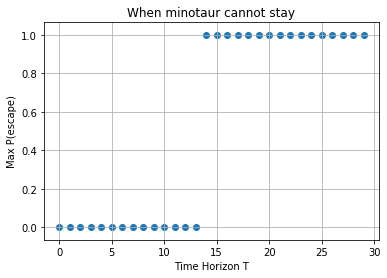

In [38]:
env = mz.Maze(maze, minotaur_cant_stay=True)
start  = (0,0,6,5)
start_state = env.map[start]
max_probs = []
for T in tqdm(range(1,31)):
    horizon = T    
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon)
    # Value of start state at t=0
    max_probs.append(V[start_state, 0]) 
_ = plt.title("When minotaur cannot stay")
_ = plt.grid("on")
_ = plt.xlabel("Time Horizon T")
_ = plt.ylabel("Max P(escape)")
_ = plt.scatter(range(0,len(max_probs)), max_probs)
_ = plt.savefig("When minotaur cannot stay.png")

#### Maximal probability of exiting the maze w.r.t T when minotaur CAN stay

100%|██████████| 30/30 [02:55<00:00,  5.84s/it]


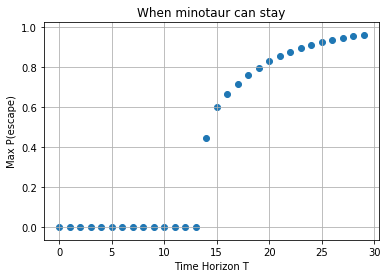

In [15]:
# Maximal probability of exiting the maze w.r.t T when minotaur can stay
env = mz.Maze(maze, minotaur_cant_stay=False)
start  = (0,0,6,5)
start_state = env.map[start]
max_probs = []
for T in tqdm(range(1,31)):
    horizon = T    
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon)
    # Value of start state at t=0
    max_probs.append(V[start_state, 0]) 
_ = plt.title("When minotaur can stay")
_ = plt.grid("on")
_ = plt.xlabel("Time Horizon T")
_ = plt.ylabel("Max P(escape)")
_ = plt.scatter(range(0,len(max_probs)), max_probs)
_ = plt.savefig("When minotaur can stay.png")

#### Solving the problem with infinite time horizon
#### Policy to help the player escape the maze as soon as possible

In [36]:
env = mz.Maze(maze, minotaur_cant_stay=True)
start  = (0,0,6,5)
start_state = env.map[start]
# Discount Factor 
gamma   = 29/30 
# Accuracy treshold 
epsilon = 0.0001
V, policy = mz.value_iteration(env, gamma, epsilon)

#### Simulate 10,000 games to evaluate the policy

In [37]:
method = 'ValIter'
sims = 10000
wins = 0
for i in range(sims):
    path = env.simulate(start, policy, method)
    if path[-1] == 'WIN':
        wins += 1
print(f"Probability of exiting the maze {wins/sims}")

Probability of exiting the maze 1.0


# Problem 2: Bank Robbing (Reloaded)
The objective of problem 2 is to learn a policy that maximizes the amount, the robber can steal from the bank

In [16]:
# Description of the town as a numpy array
town = np.array([
    [0, 0, 0, 0],
    [0, 2, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]    
])
# with the convention 
# 0 = empty cell
# 2 = bank

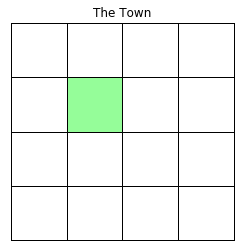

In [17]:
bank.draw_town(town)

In [18]:
# Create an environment maze
env = bank.Town(town, police_cant_stay=True)
# env.show()

In [19]:
# Starting state
start  = (0,0,3,3)
# States of interest for vizualising the learning
SOI = [start,(1,1,3,3),(0,0,1,1),(3,3,0,0)]
log_states = []
for x in SOI:
    log_states.append(env.map[x])

#### Solving the problem using Q-Learning

In [14]:
Q = bank.QLearning(env,start, log_states)

100%|██████████| 10000000/10000000 [14:10<00:00, 11751.72it/s]


#### Solving the problem using SARSA

100%|██████████| 5000/5000 [00:01<00:00, 3580.44it/s]


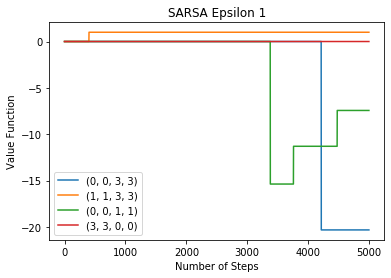

In [21]:
Q = bank.SARSA(env, start, log_states, epsilon=1, steps = 5000)